## Principal Component Analysis with MNIST Digit Dataset

**Name - Surname** = Ozan Can Demir

**Student Number** = 402533

**Department**       = Data Science and Business Analytics

**Project**          = Principal Component Analysis 
  
### Purpose

**Principal Component Analysis (PCA)** is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning. High dimensionality means that the dataset has a large number of features. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set.

reference: https://medium.com/apprentice-journal/pca-application-in-machine-learning-4827c07a61db

The purpose of the project to show the importance of the Principal Component Analysis in machine learning techniques. When there is huge dataset wiht huge number of components, it is likely to be unreliable result if you rund the model. PCA can be the solution to extract a low number of components from a dataset with high number of components.

So, basically our aim is to lower the components, but still we will make sure to get most of the information in the dataset. Why we need smaller dataset? Because smaller data sets are easier to explore and visualize and make analyses data much easier and faster for machine learning algorithms without extraneous variables to process. Also large featurs slows down the training process.

### Packages

In [5]:
!pip install -U scikit-learn

In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

### Data
   [Data Set train.csv](https://www.kaggle.com/c/digit-recognizer/data?select=train.csv)
  
We select only the dataset "train.csv", because we will only apply PCA on the data.

In [7]:
train_set = pd.read_csv('C:\\Users\\ozanc\\Desktop\\UW- Data Science and Business Analytics\\First Year\\First Semester\\11- Unsupervised Learning\\UL Projects\\Associations\\train.csv')

### Details of Data Set

In [8]:
train_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_set.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

#### Missing Value Check

In [10]:
train_set.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

### Model Creation

Now, on the below we will collect labels together and pixels together in order to make them matched and use them later on in the project.

In [11]:
train_dataset = train_set.loc[:, "pixel0":]
train_label = train_set.loc[:, "label"]

In [12]:
train_label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [13]:
train_dataset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In this step, we will visualize the number of digits classes

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

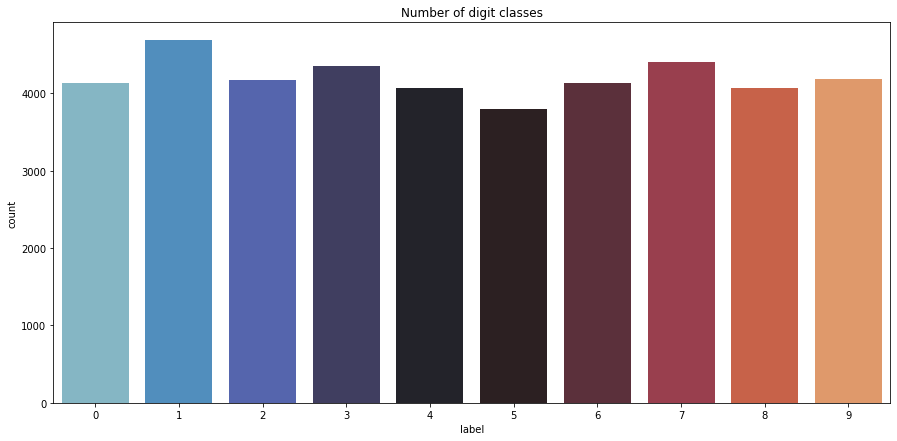

In [14]:
plt.figure(figsize=(15,7))
g = sns.countplot(train_label, palette="icefire")
plt.title("Number of digit classes")
train_label.value_counts()

Now, we will divide our dataset into 255. This is because of the RGB color pigments. The color pigments in RGB is between 0 and 255. By dividing, the range can be described with (0.0-1.0) where 0.0 means 0 (0x00) and 1.0 means 255 (0xFF).

In [15]:
train_dataset = train_dataset/255.0

In [16]:
from sklearn.preprocessing import StandardScaler

standardizedScalar = StandardScaler()
standardizedData = standardizedScalar.fit_transform(train_dataset)
print(standardizedData.shape)

(42000, 784)


In [17]:
from sklearn.decomposition import PCA

pca = PCA()
pca.n_components = 2
pcaData = pca.fit_transform(standardizedData)
pcaData.shape

(42000, 2)

In [18]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.05747953 0.04111691]


Plotting the first two principal components of each point to learn about the data:

Text(0, 0.5, 'Principal Component 2')

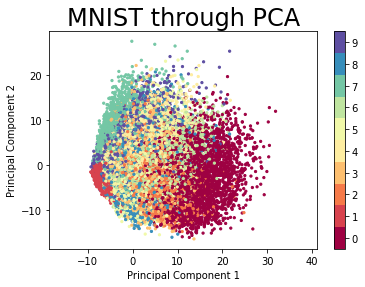

In [19]:
plt.scatter(pcaData[:, 0], pcaData[:, 1], s= 5, c=train_label, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#### Choosing the right number of components

Our goal to visualise the dataset and also ensure not to choose more than two or three dimensions accordingly.

Choosing the right number of components:

In [20]:
pca = PCA(n_components=0.95)
pca_reduced = pca.fit_transform(pcaData)

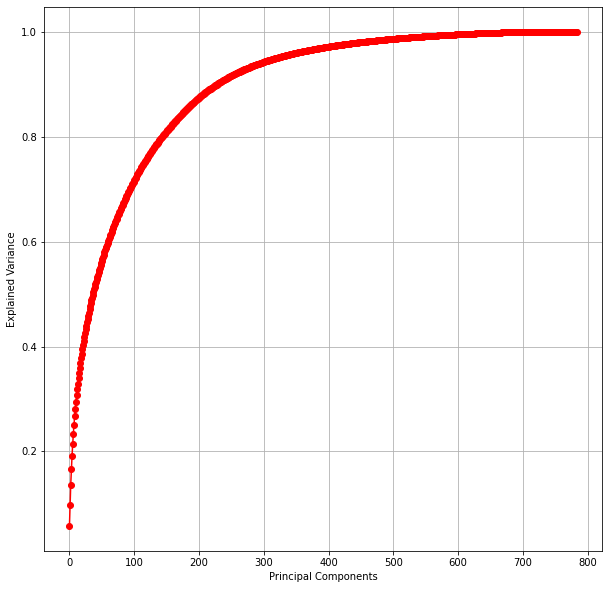

In [21]:
pca=PCA()
x_pca = pca.fit_transform(standardizedData)
plt.figure(figsize=(10,10))
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

### RESULT

Acording to the result, in order to achieve 95% successn we will need to get 500 components based on the graph above. So, we will not need more than 500 components and our model will be still reliable and we can make sure high success on our model.

In addition our training process will be much slower by using this technique. Since Principal Component Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, it will still get the variation as much as possible to give the best result.


### REFERENCES

https://towardsdatascience.com/all-you-need-to-know-about-pca-technique-in-machine-learning-443b0c2be9a1

https://en.wikipedia.org/wiki/Principal_component_analysis

https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
